# Principal Component Analysis (PCA)

`PCA` extracts the most important information. This in turn leads to compression since the less important information are discarded.   
With fewer data points to consider, it becomes simpler to describe and analyze the dataset.

__Example__:

<img src="./img/6_PCA_example.png" width="700px"><br><br>

<span style="font-size: 70%">We can describe the shape of a fish with two variables: height and width. However, these two variables have a strong correlation.<br>Given the height, we can probably estimate the width; and vice versa. Thus, we may say that the shape of a fish can be described with a single component.<br>Source: <a href="https://devopedia.org/principal-component-analysis">Devopedia</a></span>

In the image above, the blue line describes most of the variance of the data, while the dotted line explains the rest.

<br>

__Utilisation__:

- facial recognition and biometric authentication

- feature extraction and data compression

<br>

<img src="./img/6_PCA_example_2.png" width="500px">

<span style="font-size: 70%">Source: <a href="https://devopedia.org/principal-component-analysis">Devopedia</a></span>

<br>

### How PCA works

<img src="./img/6_PCA_explained.jpg" width="700px">

<span style="font-size: 70%">Source: <a href="https://devopedia.org/principal-component-analysis">Devopedia</a></span>



<img src="./img/0_critical_evaluation.png" width="150px">

### Critical evaluation

- Since `PCA` does not require labeled data, it is an unsupervised learning algorithm

- `PCA` is lossy. Information is lost when we discard insignificant components. However, this loss is minimized.

- `PCA` enables easier data visualization by reducing the number of dimensions

- `PCA` works only if the observed variables are linearly correlated. If there's no correlation, PCA will fail to capture adequate variance with fewer components

- Scaling of variables can yield different results - document scaling

- Since each principal components is a linear combination of the original features, visualizations are not easy to interpret or relate to original features.

<br>

`PCA` does not work in situations like these:<br><br>

<img src="./img/6_PCA_drawbacks.jpg" width="700px">

<span style="font-size: 70%">Source: <a href="https://devopedia.org/principal-component-analysis">Devopedia</a></span>

<br>

Let's try.

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA


In [2]:
# prepare the data
iris = load_iris()

feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
df = pd.DataFrame(iris.data, columns=feature_columns)
df['Species'] = pd.Series(iris.target_names[iris.target])

# prepare data for model building with scikit-learn
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [3]:
# train model
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

pca_df = pd.DataFrame(data=principalComponents, columns=["PC1", "PC2"])
pca_df['species'] = pd.Series(iris.target)

# how much variance does the PC expain
explained = np.around(pca.explained_variance_ratio_*100, 2)

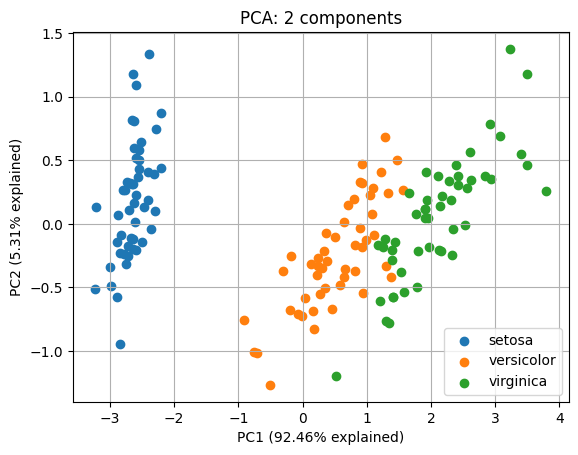

In [4]:
# visualize
colors = sns.color_palette("tab10")

for c, col in zip(range(len(iris.target_names)), colors):
    pca_1 = pca_df["PC1"].to_numpy()[pca_df["species"] == c]
    pca_2 = pca_df["PC2"].to_numpy()[pca_df["species"] == c]
    plt.scatter(pca_1, pca_2, color=col)
plt.xlabel(f"PC1 ({explained[0]}% explained)")
plt.ylabel(f"PC2 ({explained[1]}% explained)")
plt.title(f"PCA: {pca.get_params()['n_components']} components")
plt.legend(iris.target_names)
plt.grid()
plt.show()

In [5]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [6]:
pca.explained_variance_

array([4.22824171, 0.24267075])

In [7]:
principalComponents

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [8]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3